In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import time
import sheet_unfolding as su

# Simple Unfolding of Zeldovich Approximation

Text(0.5, 1.0, 'ZA + 1-step Unfolding')

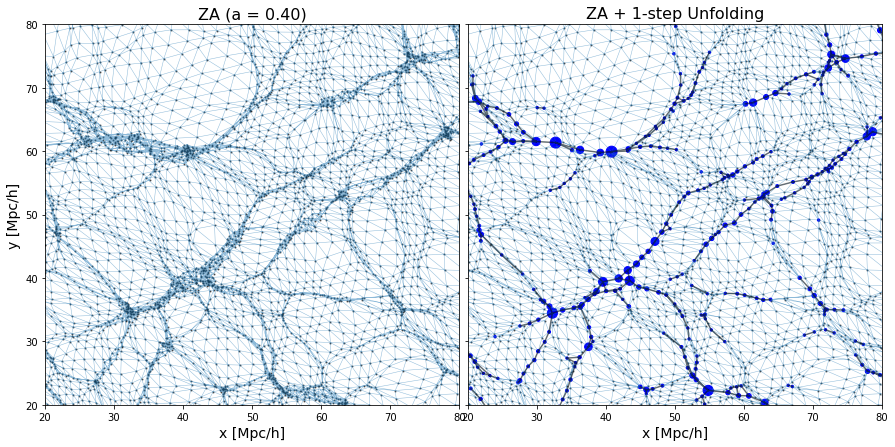

In [2]:
ngrid, a = 512, 0.4

myic = su.sim.IC2DCosmo(ngrid = ngrid, L=512., rs = 0.5, norm = 2e7)
pos0, vel0, mass0 = myic.get_particles(a=a)
tri0 = su.math.tesselation2d(pos0.shape[0])

fig, axs = plt.subplots(1,2,figsize=(15,7), sharex=True,sharey=True)
fig.subplots_adjust(hspace=0.02, wspace=0.02)

for ax in axs:
    ax.set_xlim(20,80)
    ax.set_ylim(20,80)
    ax.set_xlabel("x [Mpc/h]", fontsize=14)

pos0 = np.float32(myic.get_x(a=a).reshape(-1,2) % 512.)
mass0 = mass0.reshape(-1)

pos, mass, tri, idptr = su.unfold2d(pos0, L=512., mass=mass0)

su.plots.plot_eulerian_2d(axs[0], pos0, mass0, tri0, plotseg=False)
su.plots.plot_eulerian_2d(axs[1], pos, mass, tri)

axs[0].set_ylabel("y [Mpc/h]", fontsize=14)

axs[0].set_title("ZA (a = %.2f)" % a, fontsize=16)
axs[1].set_title("ZA + 1-step Unfolding", fontsize=16)

# Multistep Unfolding of Zeldovich Approximation

The unfolding can go a bit crazy when applied in a single step at late time, however, we can use the history information to stick particles correctly over time. Taking more steps is hardly more expensive than a single step

In [3]:
ngrid, a = 512, 0.8

myic = su.sim.ic.IC2DCosmo(ngrid = ngrid, L=512., rs = 0.5, norm = 2e7)
mass0 = myic.mass

pos0 = myic.get_x(a=a)
tri0 = su.math.tesselation2d(pos0.shape[0])

possnaps = [myic.get_x(ai) for ai in np.linspace(0.,a, 20)]

t0 = time.time()
pos, mass, tri, idptr = su.unfold2d(pos0, L=512., mass=mass0)
t1 = time.time()
pos_ms, mass_ms, tri_ms, idptr_ms = su.multistep_unfold2d(possnaps, L=512., mass=mass0)
t2 = time.time()

print("1-step: %.1fs 20-step %.1fs" % (t1-t0, t2-t1))

1-step: 1.3s 20-step 3.0s


(512, 512, 2) (512, 512) (524288, 3)


Text(0.5, 1.0, 'ZA + 1-step Unfolding')

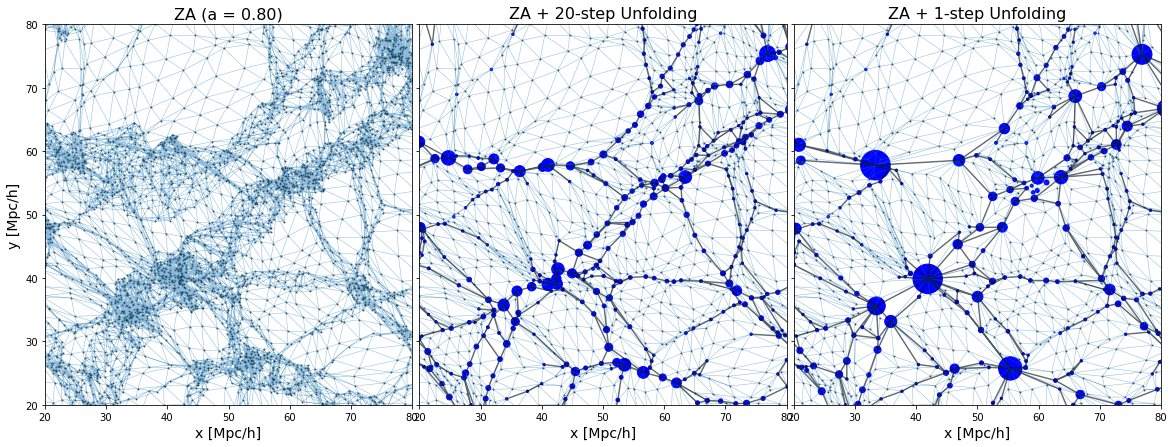

In [4]:
fig, axs = plt.subplots(1,3,figsize=(20,7), sharex=True,sharey=True)
fig.subplots_adjust(hspace=0.02, wspace=0.02)

for ax in axs:
    ax.set_xlim(20,80)
    ax.set_ylim(20,80)
    ax.set_xlabel("x [Mpc/h]", fontsize=14)

print(pos0.shape, mass0.shape, tri0.shape)

su.plots.plot_eulerian_2d(axs[0], pos0, mass0, tri0, plotseg=False)
su.plots.plot_eulerian_2d(axs[1], pos_ms, mass_ms, tri_ms)
su.plots.plot_eulerian_2d(axs[2], pos, mass, tri)

axs[0].set_ylabel("y [Mpc/h]", fontsize=14)

axs[0].set_title("ZA (a = %.2f)" % a, fontsize=16)
axs[1].set_title("ZA + 20-step Unfolding", fontsize=16)
axs[2].set_title("ZA + 1-step Unfolding", fontsize=16)

# Comparison with Adhesion Solution

In [5]:
tri_adh, pos_adh, mass_adh = myic.linear_adhesion_tess(a=a)

/scratch/stuecker/repos/sheet-unfolding-private/sheet-unfolding/sheet_unfolding/sim/ic.py:243: RuntimeWarning: divide by zero encountered in true_divide
  xadh = np.stack((norm[:,0] / norm[:,2], norm[:,1] / norm[:,2]), axis=-1)
/scratch/stuecker/repos/sheet-unfolding-private/sheet-unfolding/sheet_unfolding/sim/ic.py:243: RuntimeWarning: invalid value encountered in true_divide
  xadh = np.stack((norm[:,0] / norm[:,2], norm[:,1] / norm[:,2]), axis=-1)


Text(0.5, 1.0, 'linear Adhesion Model')

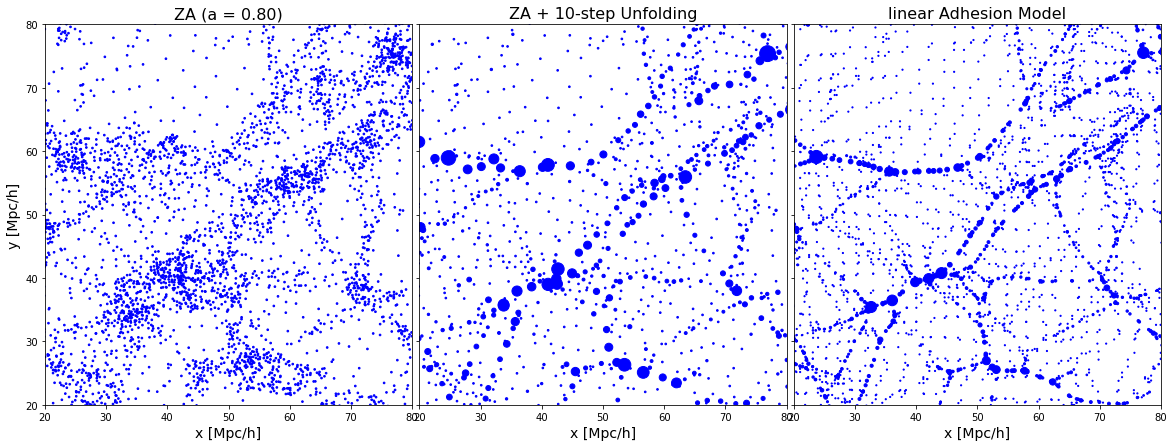

In [6]:
fig, axs = plt.subplots(1,3,figsize=(20,7), sharex=True,sharey=True)
fig.subplots_adjust(hspace=0.02, wspace=0.02)

for ax in axs:
    ax.set_xlim(20,80)
    ax.set_ylim(20,80)
    ax.set_xlabel("x [Mpc/h]", fontsize=14)

axs[0].scatter(pos0[...,0], pos0[...,1], s=mass0/1e11, color="blue")
axs[1].scatter(pos_ms[...,0], pos_ms[...,1], s=mass_ms/1e11, color="blue")
axs[2].scatter(pos_adh[...,0], pos_adh[...,1], s=mass_adh/1e11, color="blue")

axs[0].set_ylabel("y [Mpc/h]", fontsize=14)

axs[0].set_title("ZA (a = %.2f)" % a, fontsize=16)
axs[1].set_title("ZA + 10-step Unfolding", fontsize=16)
axs[2].set_title("linear Adhesion Model", fontsize=16)